In [4]:
import pandas as pd

In [7]:
!pwd

/Users/nadirgmira/code/carbon-forecast/notebooks


In [5]:
data = pd.read_csv("../raw_data/Historical_Emissions (2).csv")
pd.set_option('display.max_columns', None)
data.head(4)


,TCUID,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
0,42694,Erste Group Bank AG,AT0000652011,2005,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,7596.054435,6814.325028,164017.684486,7596.054435,31981.789915,39577.844350,1.347260,1.208610,29.090685,1.347260,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,Estimated data,0.0,5638.151346,EUR,2005-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
1,42694,Erste Group Bank AG,AT0000652011,2006,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,12552.501135,10906.081210,258799.303026,12552.501135,52125.089787,64677.590922,1.308070,1.136500,26.968945,1.308070,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,Estimated data,0.0,9596.196598,EUR,2006-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
2,42694,Erste Group Bank AG,AT0000652011,2007,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,11476.177472,9656.932392,232394.411879,11476.177472,47397.574615,58873.752087,1.270021,1.068693,25.718129,1.270021,5.245294,6.515315,0.392789,8.284776,8.677566,0.004347,0.091684,0.096031,Estimated data,0.0,9036.210000,EUR,2007-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
3,42694,Erste Group Bank AG,AT0000652011,2008,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,11104.953114,19302.583214,238060.077199,11104.953114,59544.335750,70649.288864,1.139229,1.980203,24.421979,1.139229,6.108502,7.247731,0.387685,8.985015,9.372700,0.003977,0.092175,0.096152,Estimated data,0.0,9747.780000,EUR,2008-12-31 00:00:00.0,0,2009-09-04 10:12:13.25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131061 entries, 0 to 131060
Data columns (total 41 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   TCUID                                                             131061 non-null  int64  
 1   Company                                                           131061 non-null  object 
 2   ISIN                                                              130690 non-null  object 
 3   Financial Year                                                    131061 non-null  int64  
 4   GICS Sector Code                                                  131060 non-null  float64
 5   GICS Sector Name                                                  131060 non-null  object 
 6   GICS Industry Group Code                                          131060 non-null  float64
 7   GICS Industry Group 

In [6]:
to_drop = ['ISIN','GICS Sector Code','GICS Industry Group Code','GICS Industry Code', 'GICS Sub Industry Code', \
          'GICS Description', 'Trucost Sector Name', 'Trucost Sector','Carbon Disclosure','Currency Code','Accounting Year End','FigureRestate', 'EffectiveDate','GICS Sector Name','GICS Sub Industry Name']

In [7]:
data_d = data.drop(columns=to_drop)

In [8]:
data_redux=data_d[['GICS Industry Group Name','TCUID']]

In [9]:
data_redux.shape

(131061, 2)

In [11]:
data_redux.drop_duplicates(inplace=True)

/var/folders/0k/1qhyws290kg0t6dgf70csbmm0000gn/T/ipykernel_5443/2701174569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_redux.drop_duplicates(inplace=True)


In [12]:
data_redux.shape

(21994, 2)

In [13]:
data_redux_sector=data_redux.groupby(by='GICS Industry Group Name').count()

<AxesSubplot:xlabel='GICS Industry Group Name'>

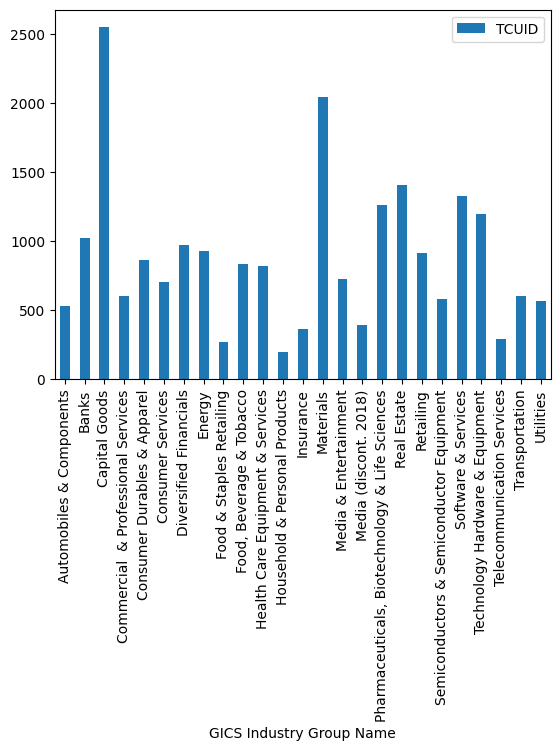

In [14]:
data_redux_sector.plot(kind='bar')

In [15]:
data_d['Country'].value_counts()

UNITED STATES             26584
JAPAN                     16792
CHINA                     13697
KOREA, REPUBLIC OF         7627
UNITED KINGDOM             7314
                          ...  
RÉUNION                       2
MALAWI                        2
TRINIDAD AND TOBAGO           2
BOSNIA AND HERZEGOVINA        1
ZAMBIA                        1
Name: Country, Length: 106, dtype: int64

In [16]:
data_d[data_d['Company'].str.contains(r'LVMH')][['Company','Country']].drop_duplicates()

,Company,Country
1314,LVMH-Moet Vuitton,FRANCE


In [17]:
data_d.columns

Index(['TCUID', 'Company', 'Financial Year', 'GICS Industry Group Name',
       'GICS Industry Name', 'Country', 'Carbon-Scope 1 (tonnes CO2e)',
       'Carbon-Scope 2 (tonnes CO2e)', 'Carbon-Scope 3 (tonnes CO2e)',
       'Carbon-Direct (tonnes CO2e)',
       'Carbon-First Tier Indirect (tonnes CO2e)',
       'Carbon-Direct+First Tier Indirect (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct (tonnes CO2e/USD mn)',
       'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)',
       'GHG-Direct (USD mn)', 'GHG-Indirect (USD mn)', 'GHG-Total (USD mn)',
       'GHG-Direct Impact Ratio (%)', 'GHG-Indirect Impact Ratio (%)',
       'GHG-Total Impact Ratio (%)', 'Carbon-Weighted Disclosure (%)',
       'Revenue (USD mn)'],
      dtype='object')

In [20]:

data_d[['GICS Industry Group Name', 'GICS Industry Name']].nunique()

GICS Industry Group Name    25
GICS Industry Name          71
dtype: int64

In [21]:
data_d['GICS Industry Name'].unique()

array(['Banks', 'Diversified Telecommunication Services',
       'Containers & Packaging', 'Insurance',
       'Diversified Financial Services', 'Metals & Mining',
       'Food & Staples Retailing', 'Beverages', 'Capital Markets',
       'Building Products', 'Industrial Conglomerates',
       'Multiline Retail', 'Oil, Gas & Consumable Fuels', 'Chemicals',
       'Distributors', 'Pharmaceuticals', 'Leisure Products',
       'Health Care Technology',
       'Electronic Equipment, Instruments & Components',
       'Commercial Services & Supplies', 'Machinery',
       'Textiles, Apparel & Luxury Goods', 'Energy Equipment & Services',
       'Food Products', 'Professional Services', 'Construction Materials',
       'Independent Power and Renewable Electricity Producers',
       'Personal Products', 'Electric Utilities', 'Auto Components',
       'Air Freight & Logistics', 'Health Care Equipment & Supplies',
       'Health Care Providers & Services', 'Household Products',
       'Semiconduct

In [22]:
group_1=data_d.groupby(by=['GICS Industry Group Name','TCUID','Financial Year'])
group_2=data_d.groupby(by=['Financial Year','TCUID','GICS Industry Group Name'])

In [23]:
value_data=['Carbon-Scope 1 (tonnes CO2e)',
       'Carbon-Scope 2 (tonnes CO2e)', 'Carbon-Scope 3 (tonnes CO2e)',
       'Carbon-Direct (tonnes CO2e)',
       'Carbon-First Tier Indirect (tonnes CO2e)',
       'Carbon-Direct+First Tier Indirect (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct (tonnes CO2e/USD mn)',
       'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)',
       'GHG-Direct (USD mn)', 'GHG-Indirect (USD mn)', 'GHG-Total (USD mn)',
       'GHG-Direct Impact Ratio (%)', 'GHG-Indirect Impact Ratio (%)',
       'GHG-Total Impact Ratio (%)', 'Carbon-Weighted Disclosure (%)',
       'Revenue (USD mn)']


In [24]:
# data_group_2=group_2.aggregate({'TCUID':'count')
d1={'TCUID':'count'}
d2=dict.fromkeys(value_data,'mean')
d3= {**d1,**d2}
d3
# data_group_2=group_2.aggregate({'TCUID':'count')

{'TCUID': 'count',
 'Carbon-Scope 1 (tonnes CO2e)': 'mean',
 'Carbon-Scope 2 (tonnes CO2e)': 'mean',
 'Carbon-Scope 3 (tonnes CO2e)': 'mean',
 'Carbon-Direct (tonnes CO2e)': 'mean',
 'Carbon-First Tier Indirect (tonnes CO2e)': 'mean',
 'Carbon-Direct+First Tier Indirect (tonnes CO2e)': 'mean',
 'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Direct (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)': 'mean',
 'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)': 'mean',
 'GHG-Direct (USD mn)': 'mean',
 'GHG-Indirect (USD mn)': 'mean',
 'GHG-Total (USD mn)': 'mean',
 'GHG-Direct Impact Ratio (%)': 'mean',
 'GHG-Indirect Impact Ratio (%)': 'mean',
 'GHG-Total Impact Ratio (%)': 'mean',
 'Carbon-Weighted Disclosure (%)': 'mean',
 'Revenue (USD mn)': 'mean'}

In [25]:
data_group_2=group_2.aggregate(d3)
data_group_2

TCUID  \
Financial Year TCUID  GICS Industry Group Name                  
2005           42694  Banks                                 1   
               42695  Telecommunication Services            1   
               42696  Materials                             1   
               42697  Insurance                             1   
               42698  Banks                                 1   
...                                                       ...   
2021           247961 Media & Entertainment                 1   
               247966 Media & Entertainment                 1   
               247973 Health Care Equipment & Services      1   
               247974 Software & Services                   1   
               248357 Materials                             1   

                                                        Carbon-Scope 1 (tonnes CO2e)  \
Financial Year TCUID  GICS Industry Group Name                                         
2005           42694  Banks                                             7.596054e+03   
               42695  Telecommunication Services                        2.527257e+04   
               42696  Materials                                         3.750938e+06   
               42697  Insurance                                         5.853555e+03   
               42698  Banks                                             9.437451e+03   
...                                                                              ...   
2021           247961 Media & Entertainment                             2.543050e+02   
               247966 Media & Entertainment                             2.191850e+02   
               247973 Health Care Equipment & Services                  5.475210e+02   
               247974 Software & Services                               1.433070e+02   
               248357 Materials                                         2.555100e+02   

                                                        Carbon-Scope 2 (tonnes CO2e)  \
Financial Year TCUID  GICS Industry Group Name                                         
2005           42694  Banks                                              6814.325028   
               42695  Telecommunication Services                        74962.638307   
               42696  Materials                                        416389.565965   
               42697  Insurance                                         10711.340000   
               42698  Banks                                              8466.218905   
...                                                                              ...   
2021           247961 Media & Entertainment                               327.598000   
               247966 Media & Entertainment                               551.991000   
               247973 Health Care Equipment & Services                    495.730000   
               247974 Software & Services                                 261.325000   
               248357 Materials                                            71.268000   

                                                        Carbon-Scope 3 (tonnes CO2e)  \
Financial Year TCUID  GICS Industry Group Name                                         
2005           42694  Banks                                             1.640177e+05   
               42695  Telecommunication Services                        3.360206e+05   
               42696  Materials                                         3.760872e+06   
               42697  Insurance                                         6.177212e+05   
               42698  Banks                                             2.037780e+05   
...                                                                              ...   
2021           247961 Media & Entertainment                             2.201501e+03   
               247966 Media & Entertainment                             3.139741e+03   
               247973 Health Care Equipm

In [26]:
data_group_1=group_1.aggregate(d2)
data_group_1

Carbon-Scope 1 (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                 
Automobiles & Components 42766  2005                            8.788821e+05   
                                2006                            1.005393e+06   
                                2007                            1.139460e+06   
                                2008                            6.369446e+05   
                                2009                            5.501366e+05   
...                                                                      ...   
Utilities                247176 2020                            1.181560e+03   
                         247188 2020                            3.706984e+04   
                         247287 2020                            9.299901e+05   
                         247718 2020                            1.005854e+04   
                         247748 2020                            3.283940e+02   

                                                Carbon-Scope 2 (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                 
Automobiles & Components 42766  2005                            6.547886e+05   
                                2006                            7.363656e+05   
                                2007                            8.376056e+05   
                                2008                            1.132779e+06   
                                2009                            9.733945e+05   
...                                                                      ...   
Utilities                247176 2020                            3.244000e+00   
                         247188 2020                            9.847900e+01   
                         247287 2020                            6.489366e+03   
                         247718 2020                            1.053251e+03   
                         247748 2020                            1.657840e+02   

                                                Carbon-Scope 3 (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                 
Automobiles & Components 42766  2005                            7.807637e+06   
                                2006                            8.494345e+06   
                                2007                            9.725154e+06   
                                2008                            1.212678e+07   
                                2009                            1.106226e+07   
...                                                                      ...   
Utilities                247176 2020                            3.496640e+02   
                         247188 2020                            1.061588e+04   
                         247287 2020                            5.925516e+04   
                         247718 2020                            2.972177e+03   
                         247748 2020                            2.756061e+03   

                                                Carbon-Direct (tonnes CO2e)  \
GICS Industry Group Name TCUID  Financial Year                                
Automobiles & Components 42766  2005                           8.789854e+05   
                                2006                           1.005518e+06   
                                2007                           1.139622e+06   
                                2008                           6.371648e+05   
                                2009                           5.503152e+05   
...                                                                     ...   
Utilities                247176 2020                           1.181560e+03   
                         247188 2020                           3.706984e+04   
                         247287 2020                           9.299901e+05   
                         247718 2020                    

In [1]:
sectors=['Oil', 'Gas & Consumable Fuels','Electric Utilities','Automobiles,Airlines,Gas Utilities']

In [ ]:
sector='Oil'

In [9]:
len(data.TCUID.unique())

19578

In [10]:
len(data.Company.unique())

19556

In [8]:
data[data.Company.str.contains(r'Toho Co.')]

,TCUID,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
28293,47749,"Toho Co., Ltd.",JP3598600009,2005,25.0,Consumer Discretionary,2540.0,Media (discont. 2018),254010.0,Media (discont. 2018),25401030.0,Movies & Entertainment (discont. 2018),Companies that engage in producing and selling...,Motion picture and video industries,512100,JAPAN,12426.187808,62990.083610,86151.963983,12426.187808,79644.879161,92071.066969,6.409112,32.488687,44.434997,6.409112,41.078808,47.487920,0.408790,4.906489,5.315278,0.021084,0.253064,0.274149,Estimated data,0.0,1938.831324,JPY,2005-02-28 00:00:00.0,0,2009-05-15 12:48:46.67
28294,47749,"Toho Co., Ltd.",JP3598600009,2006,25.0,Consumer Discretionary,2540.0,Media (discont. 2018),254010.0,Media (discont. 2018),25401030.0,Movies & Entertainment (discont. 2018),Companies that engage in producing and selling...,Motion picture and video industries,512100,JAPAN,11112.079677,54501.549349,72214.594314,11112.079677,68937.739979,80049.819656,6.340492,31.098286,41.205252,6.340492,39.335497,45.675989,0.372870,4.252094,4.624965,0.021276,0.242622,0.263898,Estimated data,0.0,1752.558009,JPY,2006-02-28 00:00:00.0,0,2009-05-15 12:48:46.67
28295,47749,"Toho Co., Ltd.",JP3598600009,2007,25.0,Consumer Discretionary,2540.0,Media (discont. 2018),254010.0,Media (discont. 2018),25401030.0,Movies & Entertainment (discont. 2018),Companies that engage in producing and selling...,Motion picture and video industries,512100,JAPAN,10333.632738,49801.461779,66574.750880,10333.632738,63218.791264,73552.424002,6.083367,29.317914,39.192280,6.083367,37.216641,43.300008,0.353684,3.983230,4.336914,0.020821,0.234491,0.255312,Estimated data,0.0,1698.670000,JPY,2007-02-28 00:00:00.0,0,2009-05-15 12:48:46.67
28296,47749,"Toho Co., Ltd.",JP3598600009,2008,25.0,Consumer Discretionary,2540.0,Media (discont. 2018),254010.0,Media (discont. 2018),25401030.0,Movies & Entertainment (discont. 2018),Companies that engage in producing and selling...,Motion picture and video industries,512100,JAPAN,12030.865602,57162.273207,69625.256270,12030.865602,72023.578057,84054.443659,6.112158,29.040706,35.372396,6.112158,36.590839,42.702997,0.420010,4.426372,4.846381,0.021338,0.224877,0.246215,Estimated data,0.0,1968.350000,JPY,2008-02-29 00:00:00.0,0,2009-05-15 12:48:46.67
28297,47749,"Toho Co., Ltd.",JP3598600009,2009,25.0,Consumer Discretionary,2540.0,Media (discont. 2018),254010.0,Media (discont. 2018),25401030.0,Movies & Entertainment (discont. 2018),Companies that engage in producing and selling...,Motion picture and video industries,512100,JAPAN,12759.496408,60698.234977,82548.998205,12759.496408,77313.632014,90073.128422,5.847749,27.818344,37.832672,5.847749,35.433274,41.281023,0.454356,5.101028,5.555384,0.020823,0.233783,0.254606,Estimated data,0.0,2181.950000,JPY,2009-02-27 00:00:00.0,0,2010-11-29 14:54:01.82
28298,47749,"Toho Co., Ltd.",JP3598600009,2010,25.0,Consumer Discretionary,2540.0,Media (discont. 2018),254010.0,Media (discont. 2018),25401030.0,Movies & Entertainment (dis

In [9]:
data["GICS Industry Group Name"].value_counts()

Capital Goods                                     15420
Materials                                         13183
Real Estate                                        8834
Banks                                              7702
Technology Hardware & Equipment                    6623
Energy                                             6221
Pharmaceuticals, Biotechnology & Life Sciences     6211
Software & Services                                5827
Food, Beverage & Tobacco                           5664
Diversified Financials                             5606
Retailing                                          5161
Consumer Durables & Apparel                        5014
Transportation                                     4490
Utilities                                          4474
Health Care Equipment & Services                   4089
Consumer Services                                  4064
Semiconductors & Semiconductor Equipment           3294
Automobiles & Components                        

In [10]:
data[data["GICS Industry Group Name"].isna()]

,TCUID,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
101485,224782,COMPAS INC,KYG2294M1134,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advertising and related services,541800,UNITED STATES,0.0,713.650024,2567.482015,0.0,1232.741738,1232.741738,0.0,11.718391,42.158982,0.0,20.242065,20.242065,0.0,0.119426,0.119426,0.0,0.196102,0.196102,NaN,NaN,60.9,USD,2015-05-17 00:00:00.0,0,2016-05-17 10:16:19.263


In [11]:
data[(data["GICS Industry Group Name"] == "Energy") & (data["Financial Year"] == 2020)]

,TCUID,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
219,42717,Woodside Energy Group Ltd,AU0000224040,2020,10.0,Energy,1010.0,Energy,101020.0,"Oil, Gas & Consumable Fuels",10102020.0,Oil & Gas Exploration & Production,Companies engaged in the exploration and produ...,Crude Petroleum and Natural Gas Extraction,211111,AUSTRALIA,9.170000e+06,1.000000e+04,3.618391e+05,9.170000e+06,1.258158e+05,9.295816e+06,2547.222,2.778,100.511,2547.222222,34.949,2582.171,364.837,14.794,379.632,10.134,0.411,10.545,Value derived from data provided in Environmen...,100.000,3600.000000,USD,2020-12-31 00:00:00.0,0,2022-07-25 10:15:44.417
394,42736,Nabors Industries Ltd.,BMG6359F1370,2020,10.0,Energy,1010.0,Energy,101010.0,Energy Equipment & Services,10101010.0,Oil & Gas Drilling,Drilling contractors or owners of drilling rig...,Drilling oil and gas wells,213111,BERMUDA,1.085215e+06,3.095831e+04,7.381013e+05,1.085215e+06,4.481233e+05,1.533338e+06,508.525,14.507,345.870,508.525367,209.988,718.513,43.176,30.599,73.775,2.023,1.434,3.457,Value derived from data provided in Environmen...,100.000,2134.043000,USD,2020-12-31 00:00:00.0,0,2022-05-05 15:30:03.817
560,42752,China Petroleum & Chemical Corporation,CNE1000002Q2,2020,10.0,Energy,1010.0,Energy,101020.0,"Oil, Gas & Consumable Fuels",10102010.0,Integrated Oil & Gas,Integrated oil companies engaged in the explor...,"Petroleum, Chemical, and Allied Products Whole...",424700A,CHINA,1.285800e+08,4.236000e+07,4.533803e+07,1.285851e+08,5.935298e+07,1.879381e+08,421.366,138.817,148.576,421.383026,194.504,615.887,5115.880,3489.316,8605.195,1.677,1.143,2.820,Value derived from data provided in Environmen...,99.996,305150.221210,CNY,2020-12-31 00:00:00.0,0,2022-05-19 12:38:38.833
634,42759,PetroChina Company Limited,CNE1000003W8,2020,10.0,Energy,1010.0,Energy,101020.0,"Oil, Gas & Consumable Fuels",10102010.0,Integrated Oil & Gas,Integrated oil companies engaged in the explor...,"Petroleum, Chemical, and Allied Products Whole...",424700A,CHINA,1.275700e+08,3.987000e+07,4.272457e+07,1.275704e+08,5.956825e+07,1.871386e+08,455.271,142.288,152.475,455.272609,212.587,667.860,5075.507,3286.152,8361.659,1.811,1.173,2.984,Value derived from data provided in Environmen...,100.000,280206.546344,CNY,2020-12-31 00:00:00.0,0,2022-01-05 11:08:23.033
1661,42862,Pharos Energy plc,GB00B572ZV91,2020,10.0,Energy,1010.0,Energy,101020.0,"Oil, Gas & Consumable Fuels",10102020.0,Oil & Gas Exploration & Production,Companies engaged in the exploration and produ...,Crude Petroleum and Natural Gas Extraction,211111,UNITED KINGDOM,1.147090e+05,6.700000e+01,1.379013e+04,1.147090e+05,4.496118e+03,1.192051e+05,849.696,0.496,102.149,849.696363,33.305,883.001,4.564,0.551,5.115,3.381,0.408,3.789,Exact Value from CDP,100.000,135.000000,USD,2020-12-31 00:00:00.0,0,2022-01-17 13:08:37.983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130410,247360,"JC Che

In [12]:
data.columns

Index(['TCUID', 'Company', 'ISIN', 'Financial Year', 'GICS Sector Code',
       'GICS Sector Name', 'GICS Industry Group Code',
       'GICS Industry Group Name', 'GICS Industry Code', 'GICS Industry Name',
       'GICS Sub Industry Code', 'GICS Sub Industry Name', 'GICS Description',
       'Trucost Sector Name', 'Trucost Sector', 'Country',
       'Carbon-Scope 1 (tonnes CO2e)', 'Carbon-Scope 2 (tonnes CO2e)',
       'Carbon-Scope 3 (tonnes CO2e)', 'Carbon-Direct (tonnes CO2e)',
       'Carbon-First Tier Indirect (tonnes CO2e)',
       'Carbon-Direct+First Tier Indirect (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 3 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct (tonnes CO2e/USD mn)',
       'Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn)',
       'Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn)',
       'GHG-Direct (USD mn)', 'GHG-Indi

In [22]:
to_drop = ['ISIN','GICS Sector Code','GICS Industry Group Code','GICS Industry Code', 'GICS Sub Industry Code', \
          'GICS Description', 'Trucost Sector Name', 'Trucost Sector','Carbon Disclosure','Currency Code','Accounting Year End','FigureRestate', 'EffectiveDate']

In [14]:
data_d = data.copy().drop(columns=to_drop)
data_d

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
0,42694,2005,Financials,Banks,Banks,Diversified Banks,7.596054e+03,6814.325028,164017.684486,7.596054e+03,31981.789915,3.957784e+04,1.347260,1.208610,29.090685,1.347260,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,0.000000,5638.151346
1,42694,2006,Financials,Banks,Banks,Diversified Banks,1.255250e+04,10906.081210,258799.303026,1.255250e+04,52125.089787,6.467759e+04,1.308070,1.136500,26.968945,1.308070,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,0.000000,9596.196598
2,42694,2007,Financials,Banks,Banks,Diversified Banks,1.147618e+04,9656.932392,232394.411879,1.147618e+04,47397.574615,5.887375e+04,1.270021,1.068693,25.718129,1.270021,5.245294,6.515315,0.392789,8.284776,8.677566,0.004347,0.091684,0.096031,0.000000,9036.210000
3,42694,2008,Financials,Banks,Banks,Diversified Banks,1.110495e+04,19302.583214,238060.077199,1.110495e+04,59544.335750,7.064929e+04,1.139229,1.980203,24.421979,1.139229,6.108502,7.247731,0.387685,8.985015,9.372700,0.003977,0.092175,0.096152,0.000000,9747.780000
4,42694,2009,Financials,Banks,Banks,Diversified Banks,2.801873e+04,65432.344312,302681.312761,2.801873e+04,114091.239716,1.421100e+05,2.403201,5.612213,25.961351,2.403201,9.785747,12.188948,0.997726,13.108528,14.106254,0.008558,0.112433,0.120991,94.431432,11658.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131056,248219,2020,Materials,Materials,Paper & Forest Products,Paper Products,1.790196e+06,319137.045000,800351.907000,1.790377e+06,618418.151000,2.408795e+06,594.947000,106.061000,265.986000,595.007333,205.523000,800.530000,71.232000,44.542000,115.774000,2.367000,1.480000,3.848000,0.000000,3009.000000
131057,248243,2020,Real Estate,Real Estate,Equity Real Estate Investment Trusts (REITs),Residential REITs,9.101170e+03,39930.108000,21908.785000,9.101170e+03,45551.770000,5.465294e+04,12.648000,55.493000,30.448000,12.648314,63.305000,75.954000,0.362000,2.460000,2.822000,0.050000,0.342000,0.392000,0.000000,719.556000
131058,248356,2020,Information Technology,Technology Hardware & Equipment,Communications Equipment,Communications Equipment,2.104051e+03,491.906000,6119.138000,2.104052e+03,1851.090000,3.955142e+03,45.660000,10.675000,132.792000,45.660347,40.171000,85.831000,0.084000,0.263000,0.347000,0.182000,0.571000,0.752000,0.000000,46.080508
131059,248357,2020,Materials,Materials,Chemicals,Commodity Chemicals,1.874000e+01,4.989000,33.731000,1.875000e+01,16.718000,3.546800e+01,257.538000,68.556000,463.539000,257.670569,229.744000,487.420000,0.001000,0.002000,0.002000,1.025000,2.117000,3.142000,0.000000,0.072767


In [48]:
both_2017_2020 = data_d[(data_d["Financial Year"] == 2020) | (data_d["Financial Year"] == 2017) ]
(both_2017_2020["TCUID"].value_counts() == 2).value_counts()

True     13024
False     5193
Name: TCUID, dtype: int64

In [21]:
both_2017_2020["GICS Sector Name"].value_counts()

Industrials               5510
Consumer Discretionary    4330
Information Technology    4203
Financials                3498
Materials                 2988
Health Care               2929
Real Estate               2223
Consumer Staples          1984
Communication Services    1522
Energy                    1196
Utilities                  858
Name: GICS Sector Name, dtype: int64

In [62]:
from_2017_2020 = data_d[(data_d["Financial Year"] == 2017) | (data_d["Financial Year"] == 2018) | (data_d["Financial Year"] == 2019) | (data_d["Financial Year"] == 2020)]
(from_2017_2020.TCUID.value_counts() == 4).value_counts()


True     12659
False     5621
Name: TCUID, dtype: int64

In [66]:
(from_2017_2020.TCUID.value_counts() == 3).value_counts()

False    16523
True      1757
Name: TCUID, dtype: int64

In [67]:
(from_2017_2020.TCUID.value_counts() == 2).value_counts()

False    16752
True      1528
Name: TCUID, dtype: int64

In [68]:
(from_2017_2020.TCUID.value_counts() == 1).value_counts()

False    15944
True      2336
Name: TCUID, dtype: int64

In [56]:
from_2017_2020

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
47,42697,2017,Financials,Diversified Financials,Diversified Financial Services,Other Diversified Financial Services,9.863340e+01,9.606000e+03,4.283455e+05,9.863340e+01,6.741128e+04,6.750991e+04,0.007219,0.703041,31.349617,0.007219,4.933676,4.940895,0.003717,16.502906,16.506622,0.000027,0.120781,0.120808,100.0,13663.498937
73,42699,2017,Materials,Materials,Metals & Mining,Aluminum,3.832950e+06,9.794030e+05,1.256027e+06,3.832958e+06,1.529447e+06,5.362406e+06,1816.908570,464.260049,595.386244,1816.912280,724.994044,2541.906324,144.430726,84.234337,228.665063,6.846356,3.992906,10.839262,100.0,2109.600000
74,42699,2018,Materials,Materials,Metals & Mining,Aluminum,3.905499e+06,1.275764e+06,1.478406e+06,3.905507e+06,1.894372e+06,5.799879e+06,1446.610000,472.547000,547.607000,1446.612780,701.682000,2148.294000,150.759000,106.316000,257.075000,5.584000,3.938000,9.522000,100.0,2699.760000
130,42705,2017,Financials,Banks,Banks,Diversified Banks,1.937596e+04,1.039360e+05,3.376815e+05,1.937596e+04,1.584569e+05,1.778328e+05,1.457089,7.816080,25.393950,1.457089,11.916097,13.373187,0.730111,16.640989,17.371100,0.005490,0.125142,0.130632,100.0,13297.714844
131,42705,2018,Financials,Banks,Banks,Diversified Banks,1.920911e+04,9.782000e+04,3.300794e+05,1.920911e+04,1.543021e+05,1.735112e+05,1.437930,7.322476,24.708629,1.437930,11.550536,12.988466,0.741503,16.517891,17.259394,0.005551,0.123647,0.129198,100.0,13358.870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129710,246054,2019,Financials,Diversified Financials,Consumer Finance,Consumer Finance,2.444100e+02,1.970104e+03,7.463685e+03,2.444100e+02,3.123877e+03,3.368287e+03,0.954000,7.693000,29.146000,0.954421,12.199000,13.153000,0.010000,0.371000,0.380000,0.004000,0.145000,0.149000,0.0,256.082030
129713,246056,2019,Consumer Discretionary,Retailing,Internet & Direct Marketing Retail,Internet & Direct Marketing Retail,1.492112e+03,6.483417e+03,1.076020e+04,1.492112e+03,8.620139e+03,1.011225e+04,9.423120,40.944651,67.953752,9.423120,54.438669,63.861788,0.058642,0.677705,0.736346,0.037034,0.427990,0.465024,0.0,158.345879
129716,246057,2019,Information Technology,Software & Services,IT Services,Internet Services & Infrastructure,2.952815e+02,6.895023e+02,3.888270e+03,2.952815e+02,1.574979e+03,1.870261e+03,3.599345,8.404716,47.396223,3.599345,19.198273,22.797618,0.011605,0.179920,0.191525,0.014146,0.219314,0.233460,0.0,82.037552
129718,246058,2019,Information Technology,Software & Services,IT Services,Data Processing & Outsourced Services,1.732852e+02,4.046328e+02,2.281822e+03,1.732852e+02,9.242729e+02,1.097558e+03,3.599345,8.404716,47.396223,3.599345,19.198273,22.797618,0.006810,0.105586,0.112396,0.014146,0.219314,0.233460,0.0,48.143547


In [97]:
id_2017_2020 = pd.DataFrame(from_2017_2020.TCUID.value_counts() == 4).reset_index()
valid_tcuid = id_2017_2020[id_2017_2020.TCUID == True].sort_values("index")
valid_tcuid

,index,TCUID
9102,42705,True
9103,42722,True
9104,42727,True
9105,42733,True
9106,42734,True
...,...,...
11677,239836,True
11688,239837,True
11630,239838,True
11717,239839,True


In [100]:
tucid_list = valid_tcuid["index"].to_list()
tucid_list

[42705,
 42722,
 42727,
 42733,
 42734,
 42737,
 42738,
 42741,
 42746,
 42749,
 42751,
 42754,
 42758,
 42762,
 42766,
 42773,
 42779,
 42786,
 42795,
 42797,
 42800,
 42809,
 42821,
 42824,
 42828,
 42832,
 42835,
 42837,
 42838,
 42843,
 42844,
 42850,
 42854,
 42863,
 42870,
 42872,
 42878,
 42884,
 42886,
 42892,
 42897,
 42909,
 42910,
 42913,
 42921,
 42922,
 42926,
 42927,
 42930,
 42934,
 42938,
 42947,
 42949,
 42964,
 42965,
 42968,
 42973,
 42985,
 42986,
 42997,
 42998,
 42999,
 43005,
 43006,
 43015,
 43019,
 43025,
 43029,
 43033,
 43034,
 43039,
 43049,
 43050,
 43051,
 43057,
 43058,
 43066,
 43068,
 43069,
 43074,
 43079,
 43080,
 43081,
 43090,
 43093,
 43094,
 43108,
 43109,
 43111,
 43113,
 43125,
 43126,
 43134,
 43136,
 43141,
 43143,
 43146,
 43151,
 43155,
 43157,
 43164,
 43168,
 43173,
 43174,
 43177,
 43180,
 43183,
 43185,
 43189,
 43193,
 43194,
 43195,
 43196,
 43197,
 43199,
 43201,
 43205,
 43206,
 43211,
 43220,
 43222,
 43225,
 43230,
 43234,
 43235,


In [118]:
data_d[data_d["TCUID"] == 51824]

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
41476,51824,2005,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,2177.503496,2922.859750,13792.881601,2177.503496,6242.805275,8420.308771,8.690547,11.665309,55.048218,8.690547,24.915411,33.605958,0.071634,0.549920,0.621554,0.028590,0.219476,0.248066,0.0,250.560000
41477,51824,2006,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,2327.072320,3011.874017,13906.133541,2327.072320,6406.515205,8733.587526,8.475255,10.969320,50.646485,8.475255,23.332688,31.807943,0.078086,0.567706,0.645792,0.028439,0.206760,0.235199,0.0,274.572533
41478,51824,2007,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,2634.894110,3288.271638,15202.884013,2634.894110,7008.056530,9642.950640,8.265297,10.314852,47.689338,8.265297,21.983301,30.248598,0.090183,0.632905,0.723088,0.028289,0.198533,0.226823,0.0,318.790000
41479,51824,2008,Energy,Energy,Energy Equipment & Services,Oil & Gas Drilling,2883.172364,3613.119756,15701.010900,2883.172364,7602.279573,10485.451936,7.988176,10.010583,43.501540,7.988176,21.063030,29.051206,0.100655,0.674295,0.774949,0.027888,0.186822,0.214709,0.0,360.930000
41480,51824,2009,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,2780.210151,3469.622362,16041.334809,2780.210151,7394.556264,10174.766414,7.956581,9.929584,45.908103,7.956581,21.162207,29.118788,0.099001,0.694790,0.793791,0.028333,0.198839,0.227172,0.0,349.422729
41481,51824,2010,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,2909.454214,3446.652945,15624.281664,2909.454214,7294.352099,10203.806313,8.197722,9.711341,44.023209,8.197722,20.552675,28.750397,0.102567,0.672329,0.774897,0.028900,0.189436,0.218336,0.0,354.910100
41482,51824,2011,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,3020.481532,3672.842133,17151.319159,3020.481532,7956.136977,10976.618509,7.620857,9.266802,43.273810,7.620857,20.073812,27.694668,0.108185,0.745884,0.854069,0.027296,0.188191,0.215487,0.0,396.344102
41483,51824,2012,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,3036.887557,3714.464814,16632.669340,3036.887557,7731.669816,10768.557373,7.443556,9.104330,40.767462,7.443556,18.950690,26.394245,0.108773,0.728798,0.837571,0.026661,0.178632,0.205293,0.0,407.988835
41484,51824,2013,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,3115.618536,3810.761910,17063.869483,3115.618536,7932.112515,11047.731052,7.331902,8.967765,40.155950,7.331902,18.666429,25.998332,0.111593,0.747692,0.859285,0.026261,0.175952,0.202213,0.0,424.940001
41485,51824,2014,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Security & Alarm Services,3297.193705,4535.915185,17660.400860,3297.193705,8606.172969,11903.366674,7.643529,10.515124,40.940205,7.643529,19.950764,27.594293,0.120104,0.808546,0.928650,0.027842,0.187437,0.215279,0.0,431.370598


In [103]:
data_d[data_d.TCUID.isin(tucid_list)]

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
119,42705,2005,Financials,Banks,Banks,Diversified Banks,23725.480000,263383.450000,425220.172526,23725.480000,313453.977546,337179.457546,1.557472,17.289952,27.913813,1.557472,20.576859,22.134331,0.780508,22.653669,23.434177,0.005124,0.148711,0.153835,100.000000,15233.324671
120,42705,2006,Financials,Banks,Banks,Diversified Banks,13054.644964,225579.860000,419084.751950,13054.644964,290573.973774,303628.618738,0.835932,14.444626,26.835385,0.835932,18.606414,19.442347,0.438054,21.632341,22.070395,0.002805,0.138519,0.141324,86.865480,15616.870940
121,42705,2007,Financials,Banks,Banks,Diversified Banks,21413.695610,218371.980000,511521.743127,21413.695610,297423.208981,318836.904592,1.066625,10.877195,25.479101,1.066625,14.814768,15.881393,0.732916,24.982166,25.715082,0.003651,0.124437,0.128088,90.005669,20076.130000
122,42705,2008,Financials,Banks,Banks,Diversified Banks,17869.900000,204469.350000,333234.023148,17869.900000,264365.406678,282235.306678,1.274404,14.581866,23.764803,1.274404,18.853393,20.127796,0.623857,18.772085,19.395942,0.004449,0.133874,0.138323,100.000000,14022.166271
123,42705,2009,Financials,Banks,Banks,Diversified Banks,17362.999888,196595.053433,396638.884402,17362.999888,268091.633134,285454.633022,1.107378,12.538445,25.296846,1.107378,17.098356,18.205733,0.618284,21.124975,21.743258,0.003943,0.134731,0.138674,100.000000,15679.381128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128086,239840,2016,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,138.363081,206.825577,846.544521,138.363081,523.086614,661.449695,14.928056,22.314507,91.334078,14.928056,56.436056,71.364112,0.005101,0.038840,0.043941,0.055040,0.419044,0.474083,0.000000,9.268660
128087,239840,2017,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,415.686161,664.035924,2637.807059,415.686161,1630.266574,2045.952735,15.120039,24.153436,95.946773,15.120039,59.298809,74.418848,0.015664,0.124423,0.140087,0.056974,0.452573,0.509547,0.000000,27.492400
128088,239840,2018,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,477.895068,776.167546,3002.747587,477.895068,1885.262809,2363.157877,14.653002,23.798497,92.068883,14.653002,57.805072,72.458074,0.018448,0.145879,0.164326,0.056563,0.447286,0.503849,0.000000,32.614142
128089,239840,2019,Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,558.067639,853.884753,3408.417618,558.067639,2142.909992,2700.977630,14.124052,21.610843,86.263139,14.124052,54.234593,68.358644,0.021933,0.167521,0.189453,0.055509,0.423976,0.479485,0.000000,39.511866


In [120]:
len(data_d[(data_d.TCUID.isin(tucid_list)) & (data_d["GICS Sector Name"] == "Energy")]["TCUID"].unique())

553

In [122]:
sector_names = data_d["GICS Sector Name"].unique()
sector_names

array(['Financials', 'Communication Services', 'Materials',
       'Consumer Staples', 'Industrials', 'Consumer Discretionary',
       'Energy', 'Health Care', 'Information Technology', 'Utilities',
       'Real Estate', nan], dtype=object)

In [123]:
output = {}
for sector_name in sector_names:
    output[sector_name] = len(data_d[(data_d.TCUID.isin(tucid_list)) & (data_d["GICS Sector Name"] == sector_name)]["TCUID"].unique())

output

{'Financials': 1508,
 'Communication Services': 660,
 'Materials': 1320,
 'Consumer Staples': 868,
 'Industrials': 2608,
 'Consumer Discretionary': 2345,
 'Energy': 553,
 'Health Care': 1129,
 'Information Technology': 1941,
 'Utilities': 397,
 'Real Estate': 994,
 nan: 0}

In [131]:
data_d[data_d["TCUID"] == 42790]

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
933,42790,2005,Industrials,Transportation,Airlines,Airlines,2.131192e+07,247502.906887,3.680010e+06,2.131192e+07,1.356169e+06,2.266809e+07,1000.132713,11.614896,172.696713,1000.132713,63.642726,1063.775439,701.107822,129.207345,830.315166,3.290181,0.606348,3.896530,99.914840,21309.093280
934,42790,2006,Industrials,Transportation,Airlines,Airlines,2.191239e+07,441421.620000,3.514833e+06,2.191239e+07,1.242306e+06,2.315470e+07,836.799023,16.857180,134.225792,836.799023,47.441649,884.240672,735.279082,132.756235,868.035317,2.807912,0.506975,3.314887,99.900604,26185.970000
935,42790,2007,Industrials,Transportation,Airlines,Airlines,2.233358e+07,311466.640191,4.646262e+06,2.233358e+07,1.692901e+06,2.402648e+07,682.361348,9.516290,141.957979,682.361348,51.723472,734.084821,764.400309,169.688762,934.089071,2.335484,0.518453,2.853937,99.881056,32729.840000
936,42790,2008,Industrials,Transportation,Airlines,Airlines,2.491131e+07,289408.260225,4.033292e+06,2.491131e+07,1.531094e+06,2.644240e+07,719.191544,8.355241,116.441489,719.191544,44.202817,763.394362,869.679489,150.912923,1020.592411,2.510772,0.435687,2.946459,99.890691,34637.930000
937,42790,2009,Industrials,Transportation,Airlines,Airlines,2.422813e+07,305946.990000,4.344723e+06,2.422813e+07,1.611937e+06,2.584007e+07,757.826885,9.569655,135.897724,757.826885,50.419470,808.246355,862.745667,165.609781,1028.355448,2.698565,0.518008,3.216573,100.000000,31970.533381
938,42790,2010,Industrials,Transportation,Airlines,Airlines,2.690040e+07,346136.750000,4.492748e+06,2.690040e+07,1.671029e+06,2.857143e+07,743.984150,9.573101,124.255880,743.984150,46.215646,790.199797,948.324219,170.589102,1118.913321,2.622779,0.471798,3.094578,100.000000,36157.223001
939,42790,2011,Industrials,Transportation,Airlines,Airlines,2.861783e+07,474016.080419,4.959506e+06,2.861783e+07,2.076956e+06,3.069479e+07,680.652832,11.274102,117.957970,680.652832,49.398787,730.051619,1025.011091,194.617127,1219.628219,2.437909,0.462882,2.900790,100.000000,42044.685719
940,42790,2012,Industrials,Transportation,Airlines,Airlines,2.811424e+07,471497.684916,4.446872e+06,2.811424e+07,1.739246e+06,2.985348e+07,726.325693,12.181048,114.884039,726.325693,44.933080,771.258773,1006.973645,176.165498,1183.139143,2.601496,0.455120,3.056616,100.000000,38707.480000
941,42790,2013,Industrials,Transportation,Airlines,Airlines,2.778513e+07,479728.913663,4.500783e+06,2.778513e+07,1.764713e+06,2.954985e+07,696.968100,12.033620,112.898589,696.968100,44.266428,741.234529,995.186108,178.391332,1173.577440,2.496346,0.447481,2.943826,100.000000,39865.719336
942,42790,2014,Industrials,Transportation,Airlines,Airlines,2.796686e+07,519847.662283,4.344136e+06,2.796686e+07,1.645907e+06,2.961277e+07,702.544825,13.058893,109.127382,702.544825,41.346191,743.891016,1018.723928,177.179282,1195.903210,2.559097,0.445085,3.004183,100.000000,39807.941100


<AxesSubplot:>

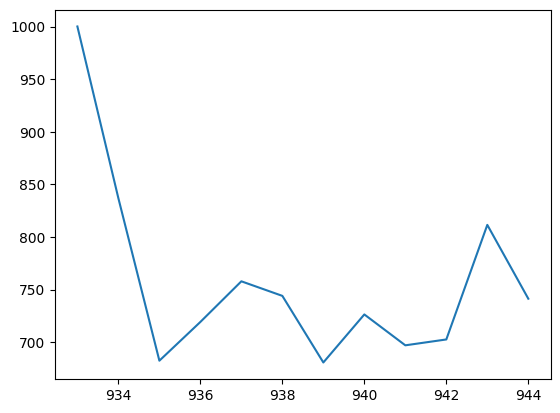

In [130]:
data_d[data_d["TCUID"] == 42790]["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()

In [126]:
data_d["GICS Industry Name"].unique()

array(['Banks', 'Diversified Telecommunication Services',
       'Containers & Packaging', 'Insurance',
       'Diversified Financial Services', 'Metals & Mining',
       'Food & Staples Retailing', 'Beverages', 'Capital Markets',
       'Building Products', 'Industrial Conglomerates',
       'Multiline Retail', 'Oil, Gas & Consumable Fuels', 'Chemicals',
       'Distributors', 'Pharmaceuticals', 'Leisure Products',
       'Health Care Technology',
       'Electronic Equipment, Instruments & Components',
       'Commercial Services & Supplies', 'Machinery',
       'Textiles, Apparel & Luxury Goods', 'Energy Equipment & Services',
       'Food Products', 'Professional Services', 'Construction Materials',
       'Independent Power and Renewable Electricity Producers',
       'Personal Products', 'Electric Utilities', 'Auto Components',
       'Air Freight & Logistics', 'Health Care Equipment & Supplies',
       'Health Care Providers & Services', 'Household Products',
       'Semiconduct

<AxesSubplot:xlabel='Financial Year'>

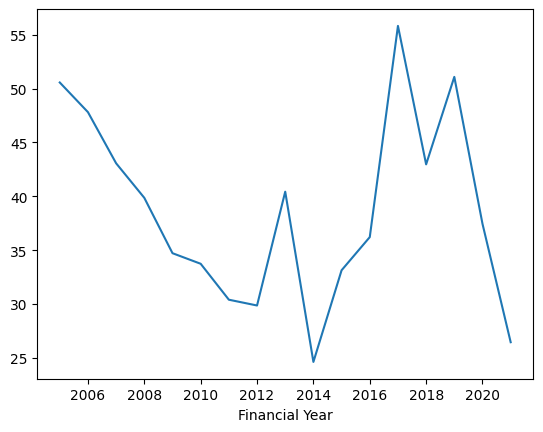

In [161]:
import matplotlib.pyplot as plt
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").mean()["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()
# plt.ylim(0,10)

In [144]:
data_d[data_d["GICS Industry Name"] == "Airlines"]

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
933,42790,2005,Industrials,Transportation,Airlines,Airlines,2.131192e+07,247502.906887,3.680010e+06,2.131192e+07,1.356169e+06,2.266809e+07,1000.132713,11.614896,172.696713,1000.132713,63.642726,1063.775439,701.107822,129.207345,830.315166,3.290181,0.606348,3.896530,99.914840,21309.093280
934,42790,2006,Industrials,Transportation,Airlines,Airlines,2.191239e+07,441421.620000,3.514833e+06,2.191239e+07,1.242306e+06,2.315470e+07,836.799023,16.857180,134.225792,836.799023,47.441649,884.240672,735.279082,132.756235,868.035317,2.807912,0.506975,3.314887,99.900604,26185.970000
935,42790,2007,Industrials,Transportation,Airlines,Airlines,2.233358e+07,311466.640191,4.646262e+06,2.233358e+07,1.692901e+06,2.402648e+07,682.361348,9.516290,141.957979,682.361348,51.723472,734.084821,764.400309,169.688762,934.089071,2.335484,0.518453,2.853937,99.881056,32729.840000
936,42790,2008,Industrials,Transportation,Airlines,Airlines,2.491131e+07,289408.260225,4.033292e+06,2.491131e+07,1.531094e+06,2.644240e+07,719.191544,8.355241,116.441489,719.191544,44.202817,763.394362,869.679489,150.912923,1020.592411,2.510772,0.435687,2.946459,99.890691,34637.930000
937,42790,2009,Industrials,Transportation,Airlines,Airlines,2.422813e+07,305946.990000,4.344723e+06,2.422813e+07,1.611937e+06,2.584007e+07,757.826885,9.569655,135.897724,757.826885,50.419470,808.246355,862.745667,165.609781,1028.355448,2.698565,0.518008,3.216573,100.000000,31970.533381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126310,238947,2008,Industrials,Transportation,Airlines,Airlines,1.460846e+07,43464.097978,1.763620e+06,1.460846e+07,6.020754e+05,1.521054e+07,958.497689,2.851788,115.715479,958.497689,39.503664,998.001353,509.996573,63.088238,573.084811,3.346215,0.413938,3.760152,99.920377,15241.000000
126311,238947,2009,Industrials,Transportation,Airlines,Airlines,1.360269e+07,35602.182125,1.723297e+06,1.360269e+07,5.687028e+05,1.417139e+07,1080.779143,2.828713,136.921778,1080.779143,45.185346,1125.964489,484.381534,62.634044,547.015578,3.848574,0.497649,4.346223,99.930088,12586.000000
126312,238947,2010,Industrials,Transportation,Airlines,Airlines,3.304842e+07,235277.000000,2.868773e+06,3.304842e+07,1.099574e+06,3.414799e+07,1422.722508,10.128589,123.499638,1422.722508,47.336253,1470.058761,1165.061382,109.429261,1274.490643,5.015547,0.471089,5.486636,99.949419,23229.000000
130047,246977,2020,Industrials,Transportation,Airlines,Airlines,2.588187e+04,63.991000,3.073151e+03,2.588187e+04,9.515250e+02,2.683339e+04,1104.458000,2.731000,131.141000,1104.458010,40.604000,1145.062000,1.030000,0.125000,1.155000,4.394000,0.533000,4.927000,0.000000,23.434000


In [162]:
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").count()

,TCUID,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
Financial Year,,,,,,,,,,,,,,,,,,,,,,,,,
2005,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
2006,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2007,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
2008,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
2009,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
2010,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
2011,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76
2012,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
2013,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113


In [168]:
tmp = (data_d[(data_d["GICS Industry Name"] == "Auto Components") & (data_d["Financial Year"] == 2005)]["TCUID"]).to_list()

In [176]:
data.set_index("TCUID", inplace=True)

In [177]:
data

,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
TCUID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42694,Erste Group Bank AG,AT0000652011,2005,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,7.596054e+03,6814.325028,164017.684486,7.596054e+03,31981.789915,3.957784e+04,1.347260,1.208610,29.090685,1.347260,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,Estimated data,0.000000,5638.151346,EUR,2005-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
42694,Erste Group Bank AG,AT0000652011,2006,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.255250e+04,10906.081210,258799.303026,1.255250e+04,52125.089787,6.467759e+04,1.308070,1.136500,26.968945,1.308070,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,Estimated data,0.000000,9596.196598,EUR,2006-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
42694,Erste Group Bank AG,AT0000652011,2007,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.147618e+04,9656.932392,232394.411879,1.147618e+04,47397.574615,5.887375e+04,1.270021,1.068693,25.718129,1.270021,5.245294,6.515315,0.392789,8.284776,8.677566,0.004347,0.091684,0.096031,Estimated data,0.000000,9036.210000,EUR,2007-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
42694,Erste Group Bank AG,AT0000652011,2008,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.110495e+04,19302.583214,238060.077199,1.110495e+04,59544.335750,7.064929e+04,1.139229,1.980203,24.421979,1.139229,6.108502,7.247731,0.387685,8.985015,9.372700,0.003977,0.092175,0.096152,Estimated data,0.000000,9747.780000,EUR,2008-12-31 00:00:00.0,0,2009-09-04 10:12:13.25
42694,Erste Group Bank AG,AT0000652011,2009,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,2.801873e+04,65432.344312,302681.312761,2.801873e+04,114091.239716,1.421100e+05,2.403201,5.612213,25.961351,2.403201,9.785747,12.188948,0.997726,13.108528,14.106254,0.008558,0.112433,0.120991,Value derived from data provided in Annual Rep...,94.431432,11658.920000,EUR,2009-12-31 00:00:00.0,0,2014-10-31 07:48:17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248219,Sylvamo Corporation,US8713321029,2020,15.0,Materials,1510.0,Materials,151050.0,Paper & Forest Products,15105020.0,Paper Products,Manufacturers of all grades of paper. E

In [185]:
data_d=data.loc[tmp]

In [188]:
data_d["Carbon Disclosure"] == "Estimated data"

TCUID
42766     True
42766     True
42766     True
42766    False
42766    False
         ...  
84327     True
84327     True
84327     True
84327     True
84327    False
Name: Carbon Disclosure, Length: 588, dtype: bool

<AxesSubplot:xlabel='Financial Year'>

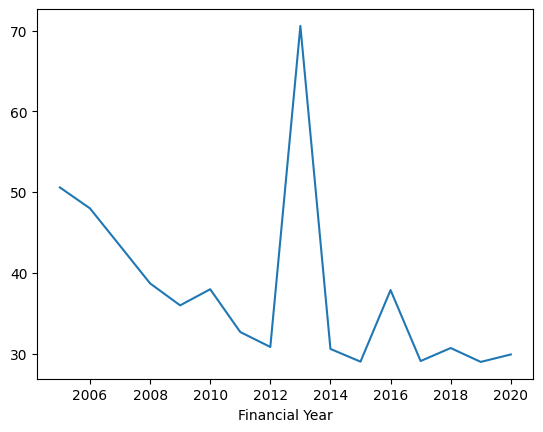

In [190]:
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").mean()["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()

<AxesSubplot:xlabel='Financial Year'>

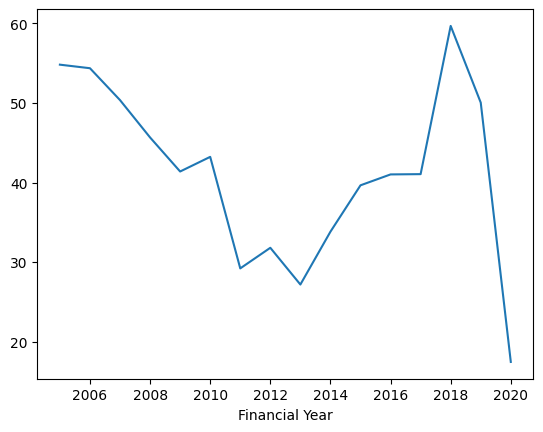

In [191]:
data_d[(data_d["GICS Industry Name"] == "Auto Components") & (data_d["Carbon Disclosure"] == "Estimated data")].groupby("Financial Year").mean()["Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)"].plot()

<AxesSubplot:xlabel='Financial Year'>

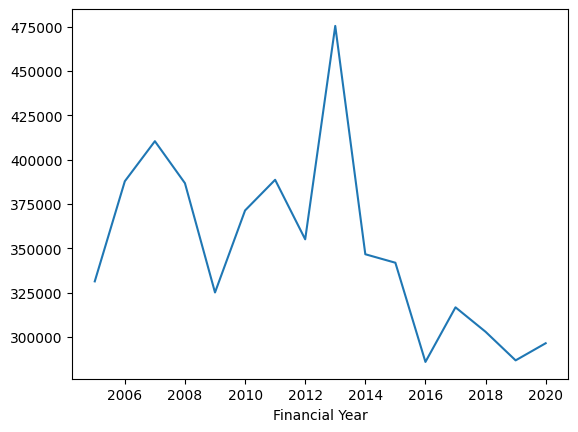

In [186]:
data_d[data_d["GICS Industry Name"] == "Auto Components"].groupby("Financial Year").mean()["Carbon-Direct (tonnes CO2e)"].plot()

In [183]:
data_d.head(2)

,TCUID,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon-Weighted Disclosure (%),Revenue (USD mn)
0,42694,2005,Financials,Banks,Banks,Diversified Banks,7596.054435,6814.325028,164017.684486,7596.054435,31981.789915,39577.844350,1.34726,1.20861,29.090685,1.34726,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,0.0,5638.151346
1,42694,2006,Financials,Banks,Banks,Diversified Banks,12552.501135,10906.081210,258799.303026,12552.501135,52125.089787,64677.590922,1.30807,1.13650,26.968945,1.30807,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,0.0,9596.196598


In [184]:
data

,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
TCUID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42694,Erste Group Bank AG,AT0000652011,2005,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,7.596054e+03,6814.325028,164017.684486,7.596054e+03,31981.789915,3.957784e+04,1.347260,1.208610,29.090685,1.347260,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,Estimated data,0.000000,5638.151346,EUR,2005-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
42694,Erste Group Bank AG,AT0000652011,2006,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.255250e+04,10906.081210,258799.303026,1.255250e+04,52125.089787,6.467759e+04,1.308070,1.136500,26.968945,1.308070,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,Estimated data,0.000000,9596.196598,EUR,2006-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
42694,Erste Group Bank AG,AT0000652011,2007,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.147618e+04,9656.932392,232394.411879,1.147618e+04,47397.574615,5.887375e+04,1.270021,1.068693,25.718129,1.270021,5.245294,6.515315,0.392789,8.284776,8.677566,0.004347,0.091684,0.096031,Estimated data,0.000000,9036.210000,EUR,2007-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
42694,Erste Group Bank AG,AT0000652011,2008,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.110495e+04,19302.583214,238060.077199,1.110495e+04,59544.335750,7.064929e+04,1.139229,1.980203,24.421979,1.139229,6.108502,7.247731,0.387685,8.985015,9.372700,0.003977,0.092175,0.096152,Estimated data,0.000000,9747.780000,EUR,2008-12-31 00:00:00.0,0,2009-09-04 10:12:13.25
42694,Erste Group Bank AG,AT0000652011,2009,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,2.801873e+04,65432.344312,302681.312761,2.801873e+04,114091.239716,1.421100e+05,2.403201,5.612213,25.961351,2.403201,9.785747,12.188948,0.997726,13.108528,14.106254,0.008558,0.112433,0.120991,Value derived from data provided in Annual Rep...,94.431432,11658.920000,EUR,2009-12-31 00:00:00.0,0,2014-10-31 07:48:17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248219,Sylvamo Corporation,US8713321029,2020,15.0,Materials,1510.0,Materials,151050.0,Paper & Forest Products,15105020.0,Paper Products,Manufacturers of all grades of paper. E